#  import kit

In [1]:
import sys
from pathlib import Path
ROOT = Path().resolve().parents[1]
sys.path.append(str(ROOT / "src"))

In [ ]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from PEC_sampler_package import PEC_Readout_Module_Sampler as pecro
from PEC_sampler_package import PEC_TQG_Module_Sampler as peccx
from PEC_sampler_package import PEC_sampler as pec
from PEC_sampler_package import Restore_Retrieve as RR
import Bellstate_CHSH as chsh

import qiskit as q
from qiskit import QuantumCircuit
from qiskit.visualization import *
from qiskit.circuit.library import *
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_aer.primitives import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService

In [3]:
token = "PJubuPXreZKAxan0yV6OLEIkdKipFYGgvvkGQSZAtpMU"
instance = 'crn:v1:bluemix:public:quantum-computing:us-east:a/f071734952cb4c9993a642d0a87d18bb:392306ae-fe55-475c-a8c5-978d0ba1871e::'
name = "torino"
device_name = "ibm_" + name
QiskitRuntimeService.save_account(
        channel="ibm_quantum_platform",
        token=token,
        instance=instance,
        set_as_default=True,
        overwrite=True
    )
service = QiskitRuntimeService()
device = service.backend(device_name)
noise_model = NoiseModel.from_backend(device)

In [35]:
backend = AerSimulator.from_backend(device)
backend_options = {
    # "method": "automatic",
    "noise_model": noise_model,
    "basis_gates": noise_model.basis_gates,
    "coupling_map": device.configuration().coupling_map,
    # parallelism knobs
    # "max_parallel_experiments":32,
    # "max_parallel_threads": 0
    # "device": "GPU",  # if you have qiskit-aer-gpu
}
run_options = {
    "shots": 1024,
    # "seed_simulator": 12345,
}

sampler = SamplerV2(
    options={
        "backend_options": backend_options,
        "run_options": run_options,
        # "default_precision": 0.0,  # if you want deterministic path where applicable
    }
)
sampler.mode=backend
backendqubitNum = backend.num_qubits
print(backendqubitNum)

133


# Build Circuit

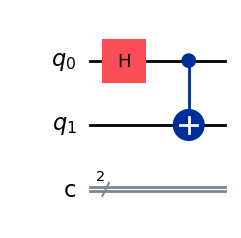

In [5]:
Bell_circuit = QuantumCircuit(2, 2)
Bell_circuit.h(0)
Bell_circuit.cx(0, 1)
Bell_circuit.draw('mpl')

# Calculate Readout PEC Observable

In [60]:
importlib.reload(pecro)
pec_readout_info = pecro.readout_pec_sampler_subsystem(Bell_circuit, sampler, backend, shots=8192, batch_mode=True, backend_options=backend_options)

Batch mode: single process, batch circuits per measurement.
II: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
IX: [-0.015625, 0.01171875, 0.900390625, -0.029296875, -0.013671875, 0.013671875, 0.89453125, -0.03125, -0.009765625, 0.05078125, 0.88671875, -0.033203125, 0.037109375, -0.052734375, 0.91015625]
IY: [0.03515625, -0.013671875, -0.009765625, 0.86328125, 0.025390625, -0.0390625, -0.005859375, 0.890625, 0.015625, 0.068359375, 0.03515625, 0.890625, 0.0234375, -0.03125, 0.033203125]
IZ: [0.8984375, -0.876953125, -0.005859375, -0.060546875, 0.921875, -0.904296875, 0.0078125, -0.015625, 0.91015625, -0.890625, 0.001953125, -0.005859375, 0.890625, -0.88671875, -0.0546875]
XI: [-0.03515625, 0.0078125, 0.01171875, 0.0234375, 0.009765625, 0.037109375, 0.03515625, 0.03125, 0.6953125, 0.705078125, 0.751953125, 0.69140625, 0.017578125, 0.046875, 0.01171875]
XX: [0.0390625, 0.001953125, 0.02734375, 0.01171875, 0.044921875, 0.0078125, 0.017578125, -0.03125, -0.03906

In [61]:
RR.save_readout_result(pec_readout_info, fname="Oweights", parent_dir="ROWeight")
# pec_readout_info = RR.load_readout_result("ROWeight/20251117-172311/Oweights.pkl")

Saved to: ROWeight/20251121-161812/Oweights.pkl


PosixPath('ROWeight/20251121-161812/Oweights.pkl')

In [62]:
B = pec_readout_info["B"]
readout_weights = pec_readout_info["ReadoutWeight"]
print("B:", B, "\nReadoutWeight:", readout_weights)

B: [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.76562500e-04  8.98437500e-01 -2.92968750e-02 -1.36718750e-02
   2.14843750e-02 -3.22265625e-02 -2.44140625e-02 -1.66015625e-02
  -6.83593750e-03  1.95312500e-02  3.12500000e-02  5.85937500e-02
  -9.76562500e-04  3.90625000e-03  1.95312500e-03  0.00000000e+00]
 [ 1.95312500e-03 -9.76562500e-03  8.75000000e-01  2.83203125e-02
   4.00390625e-02  2.92968750e-03 -2.63671875e-02 -5.46875000e-02
  -5.85937500e-03  4.68750000e-02  4.49218750e-02 -9.76562500e-04
   8.78906250e-03 -1.07421875e-02 -2.24609375e-02 -3.90625000e-03]
 [ 9.76562500e-03 -8.78906250e-03 -4.78515625e-02  9.00390625e-01
   0.00000000e+00  9.76562500e-04  3.22265625e-02  0.00000000e+00
  -7.81250000e-03 -4.78515625e-02  2.05078125e-02 -1.17187500e-02
   9

# Calculate CNOT PEC Weight

In [45]:
importlib.reload(peccx)

<module 'PEC_sampler_package.PEC_TQG_Module_Sampler' from '/home/xiaonan/PEC/src/PEC_sampler_package/PEC_TQG_Module_Sampler.py'>

In [63]:
pack = peccx.compute_tqg_matrices(sampler, Bell_circuit, shots=8192)

num_qubits: 2
(c0,t1) 1/16 (active=[0, 1])
(c0,t1) 2/16 (active=[0, 1])
(c0,t1) 3/16 (active=[0, 1])
(c0,t1) 4/16 (active=[0, 1])
(c0,t1) 5/16 (active=[0, 1])
(c0,t1) 6/16 (active=[0, 1])
(c0,t1) 7/16 (active=[0, 1])
(c0,t1) 8/16 (active=[0, 1])
(c0,t1) 9/16 (active=[0, 1])
(c0,t1) 10/16 (active=[0, 1])
(c0,t1) 11/16 (active=[0, 1])
(c0,t1) 12/16 (active=[0, 1])
(c0,t1) 13/16 (active=[0, 1])
(c0,t1) 14/16 (active=[0, 1])
(c0,t1) 15/16 (active=[0, 1])
(c0,t1) 16/16 (active=[0, 1])


In [64]:
pec_tqg_info = peccx.averaged_pauli_twirling_matrix(pack, B=pec_readout_info["B"])
tqg_weights = peccx.compute_inv_weights_for_package(pec_tqg_info)
tqg_weights

{(0,
  1): array([ 0.73984824,  0.26241448,  0.00310071,  0.00982463,  0.00264031,
        -0.01005509,  0.25868135, -0.24160723,  0.0012726 ,  0.00652535,
        -0.25315813,  0.23629224,  0.253233  , -0.26004893, -0.00407425,
        -0.00488929])}

In [65]:
RR.save_vectors(tqg_weights, fname="Gweights", parent_dir="TQGWeight")

{'dir': 'TQGWeight/20251121-161846',
 'npy': 'TQGWeight/20251121-161846/Gweights.npy',
 'npz': 'TQGWeight/20251121-161846/Gweights.npz',
 'csv_list': ['TQGWeight/20251121-161846/Gweights_c0_t1.csv'],
 'meta_json': 'TQGWeight/20251121-161846/Gweights_meta.json',
 'mat': 'TQGWeight/20251121-161846/Gweights.mat'}

In [17]:
load_weights = RR.load_vectors("TQGWeight/20251117-163904/weights.npy")
tqg_weights = load_weights["vectors"]

In [52]:
importlib.reload(pec)
importlib.reload(chsh)
importlib.reload(RR)

<module 'PEC_sampler_package.Restore_Retrieve' from '/home/xiaonan/PEC/src/PEC_sampler_package/Restore_Retrieve.py'>

In [72]:
# 2) 你的 readout 與 TQG 權重
# readout_weight: {'XX': w_vec(16), 'ZX': ..., 'XZ': ..., 'ZZ': ...}
# weights_map_tqg: {(c,t): np.ndarray length 4^n}  (n=電路總 qubits；或 m=active 也行，只要一致)
n_trials=20
S_pec, S_nopec, summary, details_pec, details_nopec, meas_pec, meas_nopec = chsh.compare_pec_vs_nopec_sampler(
    sampler=sampler,
    qcircuit=Bell_circuit,
    tqg_weights=tqg_weights,
    readout_weights=readout_weights,
    n_trials=n_trials,
    backend=backend,
    opt_level=0,
    shots=2048,
    combo_batch_size=256,
    max_batch=4096
)

print("=== Summary over trials ===")
print(summary)

[ 1.         -0.00292969 -0.00976562  0.01367188 -0.04394531  0.66601562
  0.00976562 -0.0078125  -0.01367188 -0.0078125  -0.71582031  0.02441406
  0.00195312 -0.02148438 -0.00292969  0.67578125]
16/16 (100.0%)
{'measII': {'obs': 'measII', 'value': 0.9999999999999996}, 'measXI': {'obs': 'measXI', 'value': -0.005515166298880864}, 'measYI': {'obs': 'measYI', 'value': -0.01449685234458677}, 'measZI': {'obs': 'measZI', 'value': -0.0292125596829496}, 'measIX': {'obs': 'measIX', 'value': 0.020877647249778645}, 'measXX': {'obs': 'measXX', 'value': 0.6687779627614199}, 'measYX': {'obs': 'measYX', 'value': 0.0010483102126249138}, 'measZX': {'obs': 'measZX', 'value': -0.019043143062122538}, 'measIY': {'obs': 'measIY', 'value': 0.007543595801654937}, 'measXY': {'obs': 'measXY', 'value': 0.0028776559947989114}, 'measYY': {'obs': 'measYY', 'value': -0.6493107165720496}, 'measZY': {'obs': 'measZY', 'value': -0.004224073360039903}, 'measIZ': {'obs': 'measIZ', 'value': -0.002645581146584995}, 'measXZ'

In [70]:
experiment_results={
    "S_pec": S_pec,
    "S_nopec": S_nopec,
    "summary": summary,
    "details_pec": details_pec,
    "details_nopec": details_nopec,
    "meas_pec": meas_pec,
}
RR.save_experiment_results(experiment_results, fname = "bellstate", parent_dir = "BellState_results")
# with open("BellState_results/20251118-114007/bellstate.pkl", "rb") as f: data = pickle.load(f)
print(experiment_results)

Saved to: BellState_results/20251122-104217/bellstate.pkl
{'S_pec': array([2.71157932, 2.74887153, 2.73123767, 2.79691532, 2.82587227,
       2.69006585, 2.7987239 , 2.78408858, 2.81706361, 2.76851616]), 'S_nopec': array([1.83820142, 1.86167957, 1.90725481, 1.83405821, 1.8174854 ,
       1.87272812, 1.83543928, 1.86858491, 1.85339316, 1.91416015]), 'summary': {'PEC_mean': 2.7672934219874885, 'PEC_std': 0.045661799485254874, 'noPEC_mean': 1.8602985044107019, 'noPEC_std': 0.03163419430535498}, 'details_pec': [{'E00': 0.6738930358066607, 'E01': 0.6668708264636598, 'E10': 0.7460385155681446, 'E11': -0.6247769468660492, 'S': 2.7115793247045143}, {'E00': 0.6559600477427637, 'E01': 0.6671626021226809, 'E10': 0.7301448272360667, 'E11': -0.695604056168103, 'S': 2.748871533269614}, {'E00': 0.6420404489891396, 'E01': 0.7531970688755469, 'E10': 0.7001436354655219, 'E11': -0.6358565201340128, 'S': 2.7312376734642214}, {'E00': 0.7136569482599903, 'E01': 0.6802955811434723, 'E10': 0.7181063850129811,

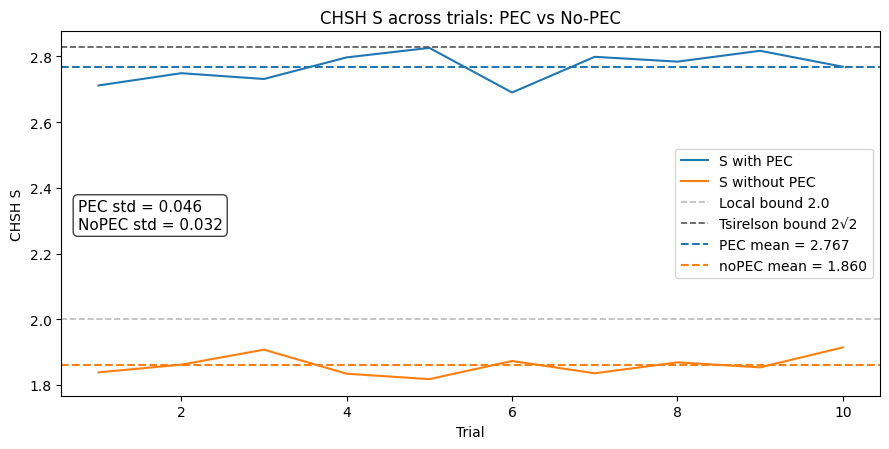

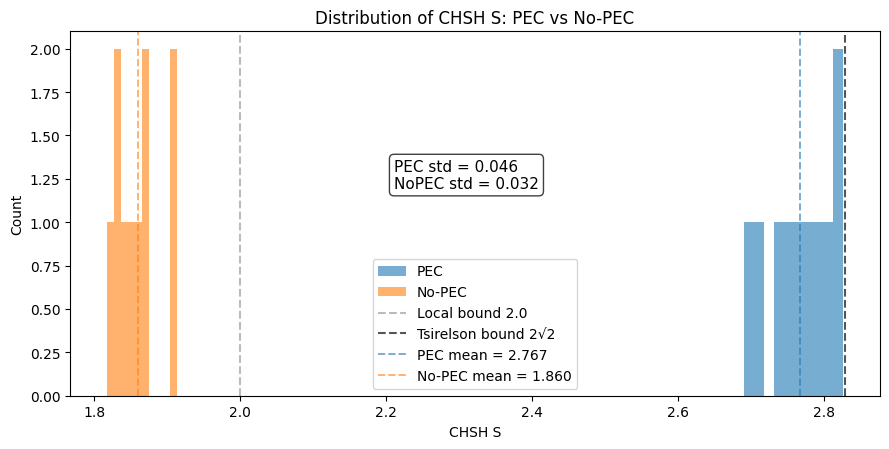

[SAVE] CHSH_trial → output_graph/20251122-104218_10/CHSH_trial.png
[SAVE] CHSH_distribution → output_graph/20251122-104218_10/CHSH_distribution.png


In [ ]:
# ======  畫圖：折線 + 兩條平均線；以及分布（直方圖） ======
dark_gray = "#555555"  
light_gray = "#bbbbbb"
# 折線圖（每次 trial 的 S 值）
plt.figure(figsize=(9,4.6))
fig_trial = plt.gcf() 
line_pec, = plt.plot(range(1, n_trials+1), S_pec, label="S with PEC")
line_nopec, = plt.plot(range(1, n_trials+1), S_nopec, label="S without PEC")
plt.axhline(2.0, linestyle="--", linewidth=1.2, color=light_gray, label="Local bound 2.0")
plt.axhline(2*np.sqrt(2), linestyle="--", linewidth=1.2, color=dark_gray, label="Tsirelson bound 2√2")
plt.axhline(summary["PEC_mean"], linestyle="--", color=line_pec.get_color(), label=f"PEC mean = {summary['PEC_mean']:.3f}")
plt.axhline(summary["noPEC_mean"], linestyle="--", color=line_nopec.get_color(), label=f"noPEC mean = {summary['noPEC_mean']:.3f}")
plt.xlabel("Trial")
plt.ylabel("CHSH S")
plt.title("CHSH S across trials: PEC vs No-PEC")
textstr = (
    f"PEC std = {summary['PEC_std']:.3f}\n"
    f"NoPEC std = {summary['noPEC_std']:.3f}"
)
plt.gca().text(
    0.02, 0.45, textstr,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='bottom',
    horizontalalignment='left',
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.75)
)
plt.legend()
plt.tight_layout()
plt.show()

# 直方圖（分布比較）
plt.figure(figsize=(9,4.6))
fig_dist = plt.gcf() 
n_pec, bins_pec, patches_pec = plt.hist(S_pec, bins=max(10, n_trials//5), alpha=0.6, label="PEC", orientation="horizontal")
n_nopec, bins_nopec, patches_nopec = plt.hist(S_nopec, bins=max(10, n_trials//5), alpha=0.6, label="No-PEC", orientation="horizontal")
plt.axhline(2.0, linestyle="--", color=light_gray, label="Local bound 2.0")
plt.axhline(2*np.sqrt(2), linestyle="--", color=dark_gray, label="Tsirelson bound 2√2")
plt.axhline(summary["PEC_mean"], linestyle="--", color=patches_pec[0].get_facecolor(), linewidth=1.4, label=f"PEC mean = {summary['PEC_mean']:.3f}")
plt.axhline(summary["noPEC_mean"], linestyle="--", color=patches_nopec[0].get_facecolor(), linewidth=1.4, label=f"No-PEC mean = {summary['noPEC_mean']:.3f}")
plt.xlabel("Count")
plt.ylabel("CHSH S")
plt.title("Distribution of CHSH S: PEC vs No-PEC")
textstr = (
    f"PEC std = {summary['PEC_std']:.3f}\n"
    f"NoPEC std = {summary['noPEC_std']:.3f}"
)
plt.gca().text(
    0.6, 0.85, textstr,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.75)
)
plt.legend()
plt.tight_layout()
plt.show()
save_dir = RR.save_chsh_figures(fig_trial, fig_dist, n_trials, parent_dir="output_graph")